Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
# Load the dataset
pcf_dataset = pd.read_excel('optical_properties.xlsx', sheet_name="combined_data")

In [ ]:
pcf_dataset.head()

,Pitch (um),Wavelength (um),Confinement Loss (1/m),Confinement Loss (db/cm),Effective Mode Index(neff),Effective Mode Area(Aeff) (m^2),diff(neff)/diff(Wl),Dispersion
0,1.87,0.400,-311.399112,2.493317,1.465337,3.471310e-12,294.403591,18115.721042
1,1.87,0.405,-317.872837,2.502253,1.464691,3.480791e-12,294.277645,18579.392916
2,1.87,0.410,-325.020785,2.511911,1.464065,3.490340e-12,294.155385,19048.889205
3,1.87,0.415,-332.762344,2.522134,1.463457,3.499963e-12,294.036608,19524.212868
4,1.87,0.420,-340.967056,2.532712,1.462866,3.509663e-12,293.921129,20005.366845


In [ ]:
pcf_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pitch (um)                       847 non-null    float64
 1   Wavelength (um)                  847 non-null    float64
 2   Confinement Loss (1/m)           847 non-null    float64
 3   Confinement Loss (db/cm)         847 non-null    float64
 4   Effective Mode Index(neff)       847 non-null    float64
 5   Effective Mode Area(Aeff) (m^2)  847 non-null    float64
 6   diff(neff)/diff(Wl)              847 non-null    float64
 7   Dispersion                       847 non-null    float64
dtypes: float64(8)
memory usage: 53.1 KB


In [ ]:
pcf_dataset.shape

(847, 8)

In [ ]:
pcf_dataset.describe()

,Pitch (um),Wavelength (um),Confinement Loss (1/m),Confinement Loss (db/cm),Effective Mode Index(neff),Effective Mode Area(Aeff) (m^2),diff(neff)/diff(Wl),Dispersion
count,847.000000,847.000000,8.470000e+02,847.000000,847.000000,8.470000e+02,847.000000,8.470000e+02
mean,1.900000,0.700000,-1.227312e+04,2.848746,1.444264,4.250946e-12,287.857505,-1.501906e+05
std,0.020012,0.174746,1.056682e+05,0.405785,0.010153,4.692071e-13,26.428626,2.914286e+06
min,1.870000,0.400000,-1.028660e+06,2.477232,1.427788,3.208631e-12,-1.014517,-3.390453e+07
25%,1.880000,0.550000,-9.890604e+02,2.599690,1.435596,3.853123e-12,288.506804,3.393138e+04
50%,1.900000,0.700000,-6.050755e+02,2.781810,1.443151,4.207452e-12,290.020619,5.552448e+04
75%,1.920000,0.850000,-3.978233e+02,2.995223,1.452208,4.633700e-12,291.824202,8.251988e+04
max,1.930000,1.000000,-3.000766e+02,6.012272,1.465602,5.189990e-12,294.457891,2.292054e+07


## Data Visualization

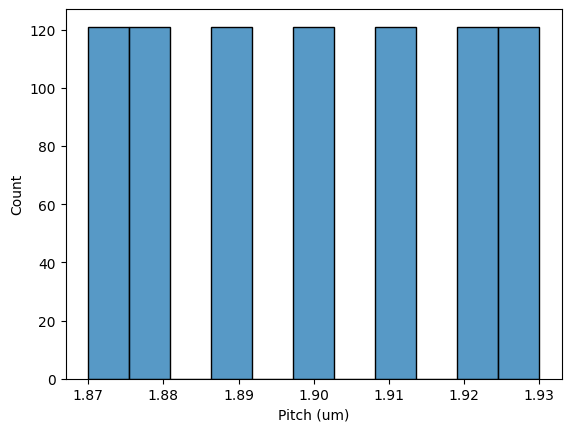

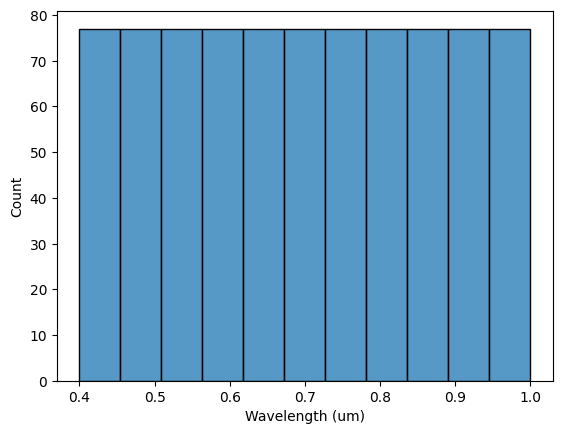

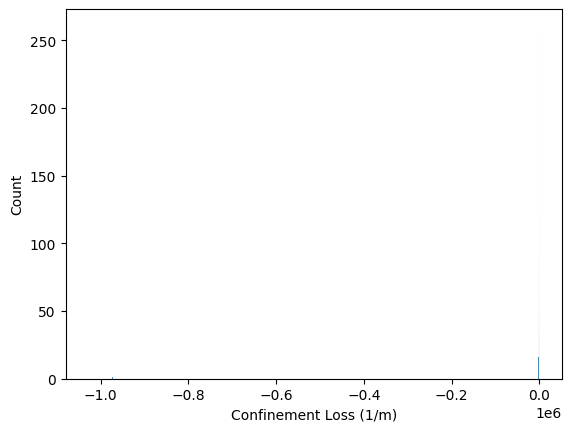

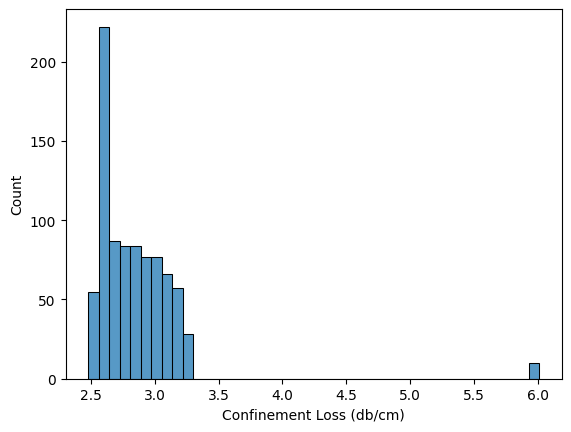

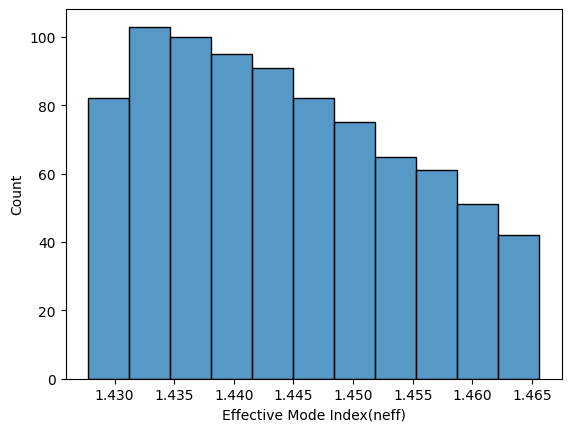

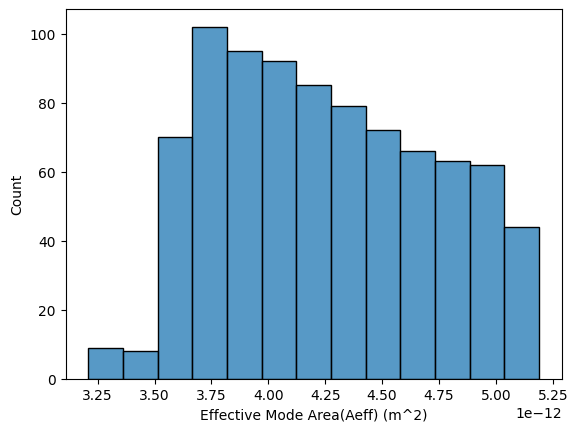

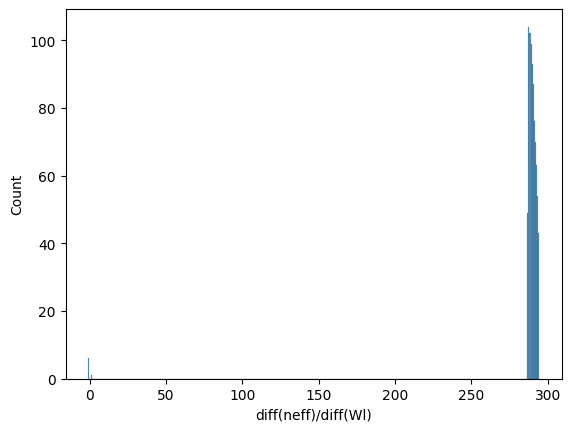

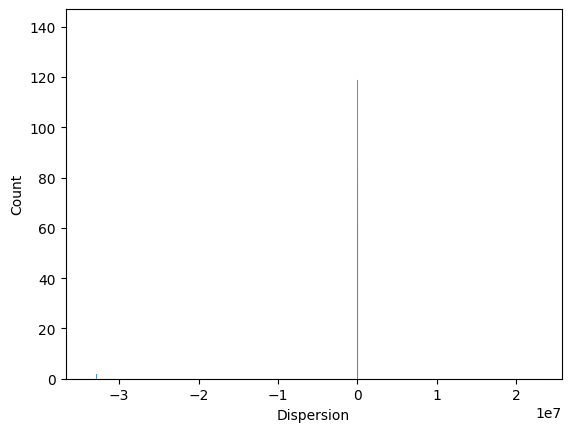

In [ ]:
#Univariate analysis->exploring the data
for i in pcf_dataset.columns:
    if pcf_dataset[i].dtype!="object":
        sns.histplot(x=pcf_dataset[i]);
        plt.show();

## Box Plot

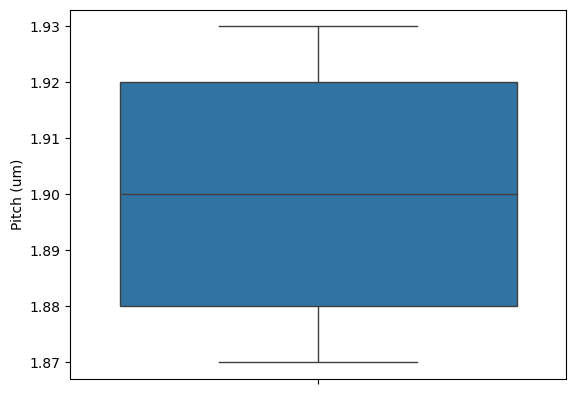

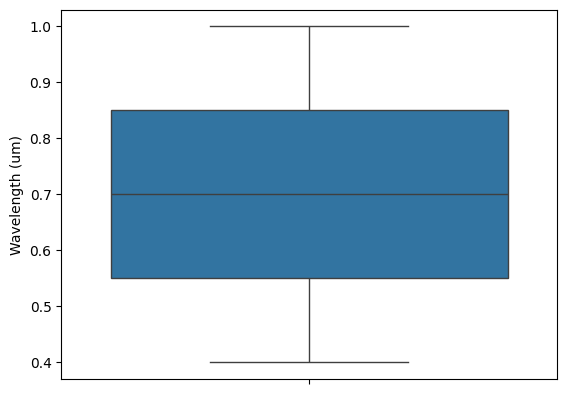

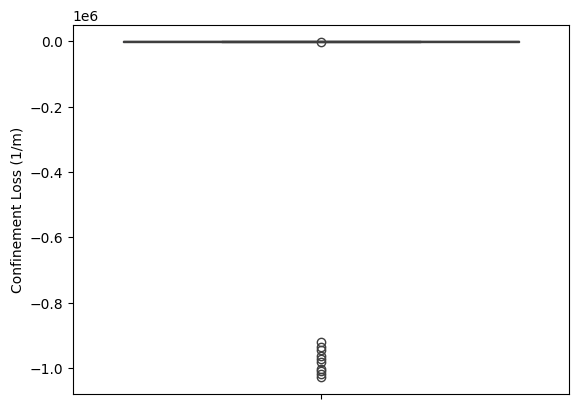

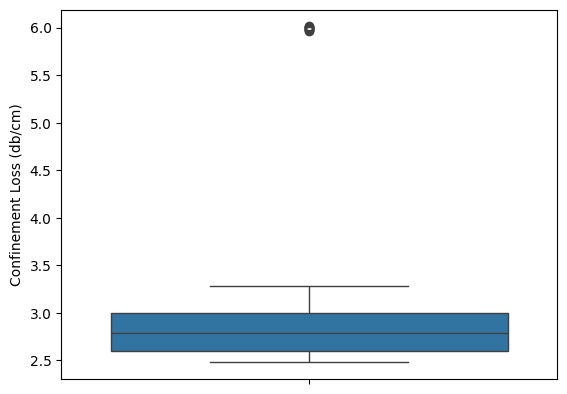

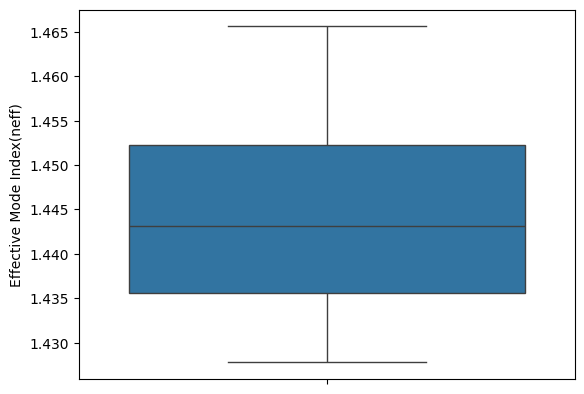

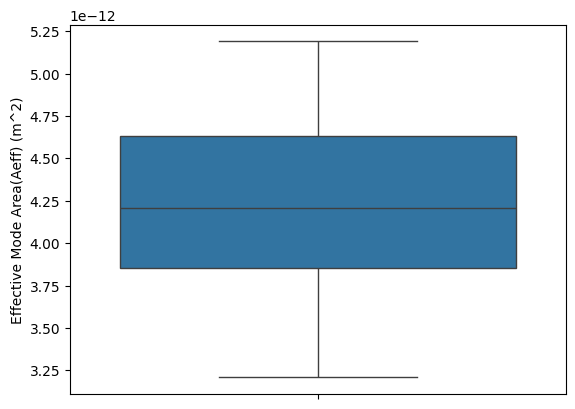

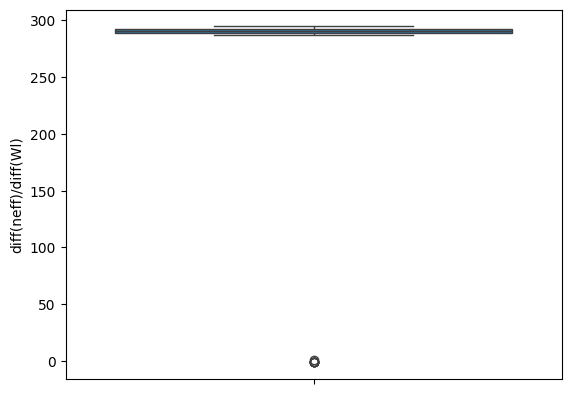

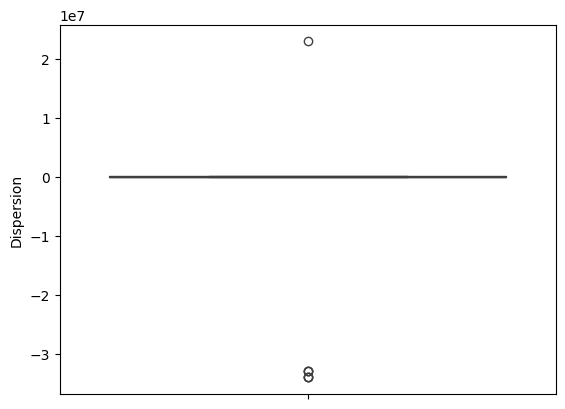

In [ ]:
for i in pcf_dataset.columns:
    if pcf_dataset[i].dtype != "object":
        sns.boxplot(y=pcf_dataset[i])
        plt.show()

In [ ]:
# #we can observe that we have outliers present in confinement loss, diff, dispersion
# #outliers remove
# per25 = pcf_dataset['Confinement Loss (1/m)'].quantile(0.25)
# per75 = pcf_dataset['Confinement Loss (1/m)'].quantile(0.75)
# IQR= per75-per25
# Confinement_Loss_ul = per75 + 1.5*IQR
# Confinement_Loss_ll = per25 - 1.5*IQR

# new_df = pcf_dataset[(pcf_dataset['Confinement Loss (1/m)'] > Confinement_Loss_ll) & (pcf_dataset['Confinement Loss (1/m)'] < Confinement_Loss_ul)]

In [ ]:
per25 = pcf_dataset['diff(neff)/diff(Wl)'].quantile(0.25)
per75 = pcf_dataset['diff(neff)/diff(Wl)'].quantile(0.75)
IQR= per75-per25
diff_ul = per75 + 1.5*IQR
diff_ll = per25 - 1.5*IQR

new_df = pcf_dataset[(pcf_dataset['diff(neff)/diff(Wl)'] > diff_ll) & (pcf_dataset['diff(neff)/diff(Wl)'] < diff_ul)]

In [ ]:
per25 = pcf_dataset['Dispersion'].quantile(0.25)
per75 = pcf_dataset['Dispersion'].quantile(0.75)
IQR= per75-per25
Dispersion_ul = per75 + 1.5*IQR
Dispersion_ll = per25 - 1.5*IQR

new_df = pcf_dataset[(pcf_dataset['Dispersion'] > Dispersion_ll) & (pcf_dataset['Dispersion'] < Dispersion_ul)]

In [ ]:
# per25 = pcf_dataset['Confinement Loss (db/cm)'].quantile(0.25)
# per75 = pcf_dataset['Confinement Loss (db/cm)'].quantile(0.75)
# IQR= per75-per25
# CL_ul = per75 + 1.5*IQR
# CL_ll = per25 - 1.5*IQR

# new_df = pcf_dataset[(pcf_dataset['Confinement Loss (db/cm)'] > CL_ll) & (pcf_dataset['Confinement Loss (db/cm)'] < CL_ul)]

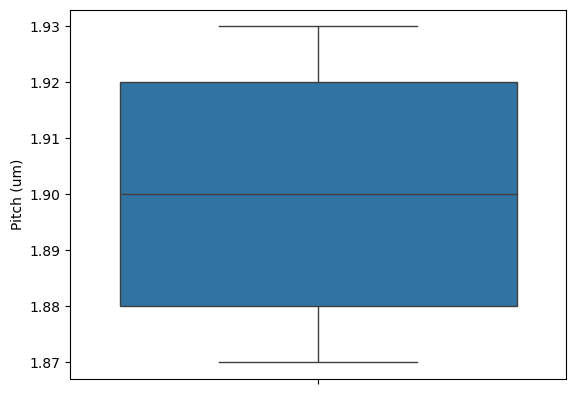

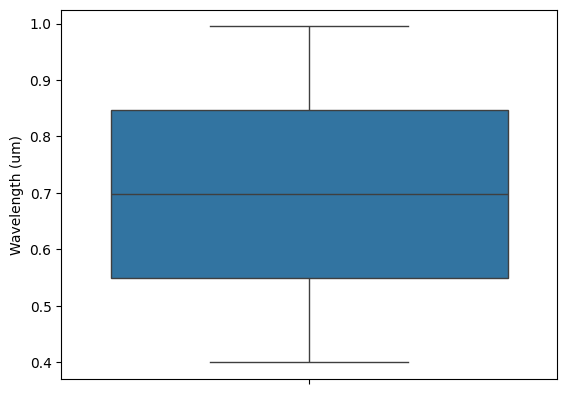

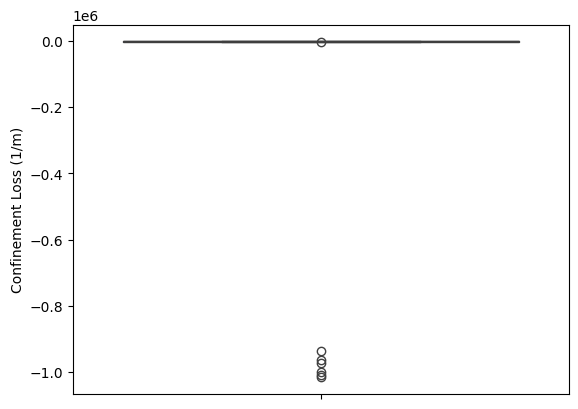

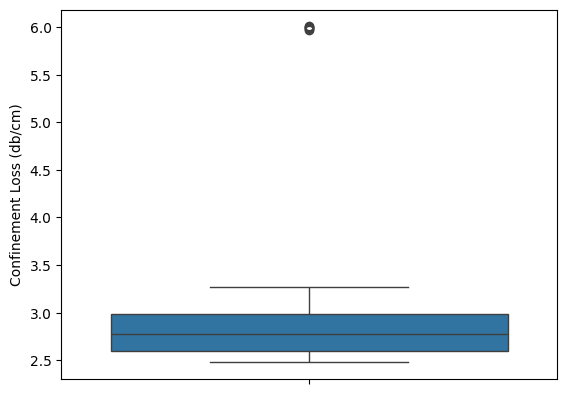

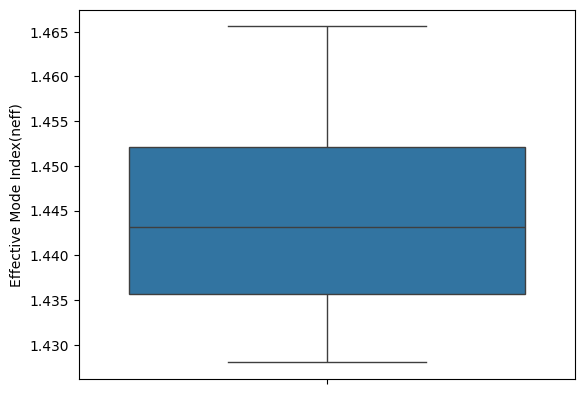

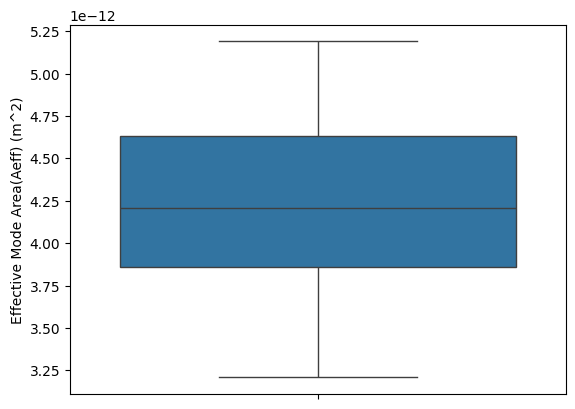

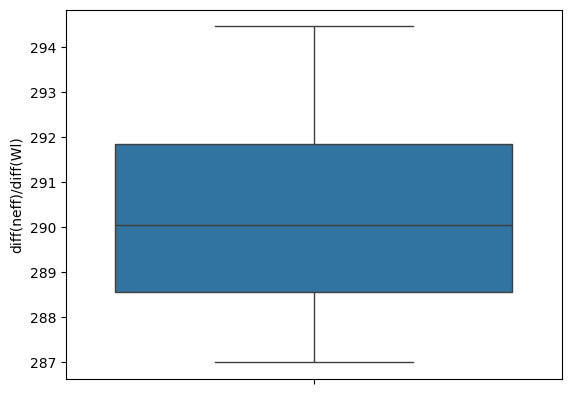

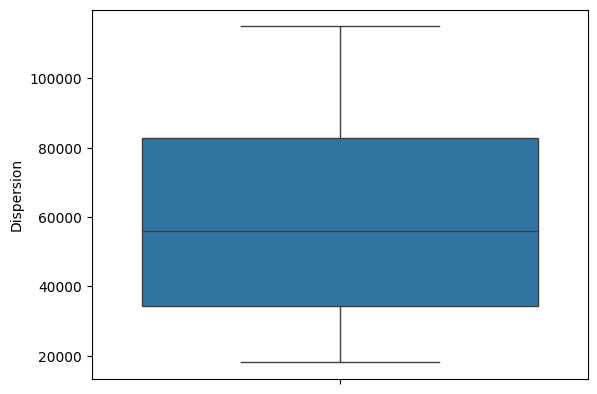

In [ ]:
for i in new_df.columns:
    if new_df[i].dtype != "object":
        sns.boxplot(y=new_df[i])
        plt.show()

In [ ]:
new_df.shape

(840, 8)

## Heat Map

<Axes: >

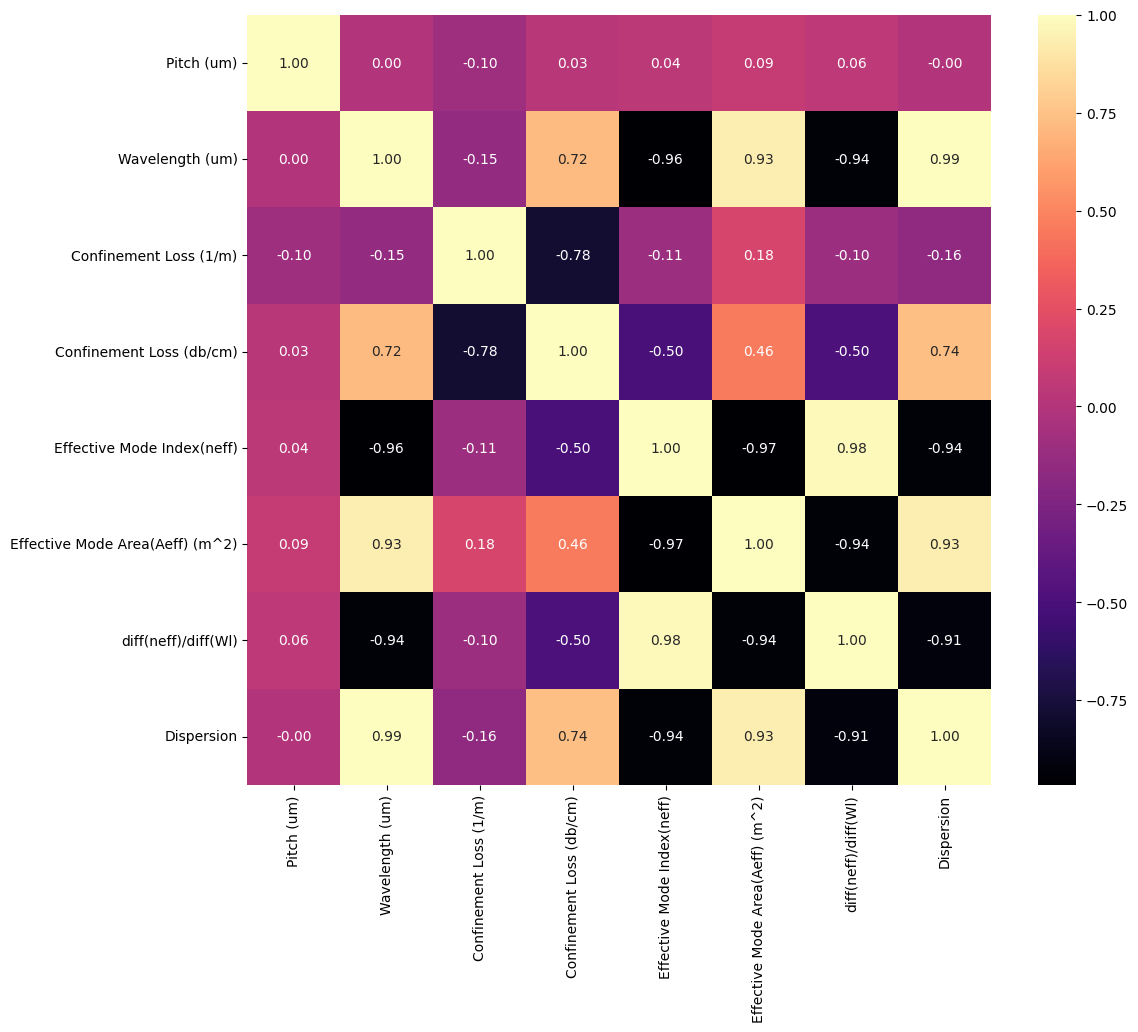

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(),annot=True,cmap="magma",fmt='.2f')

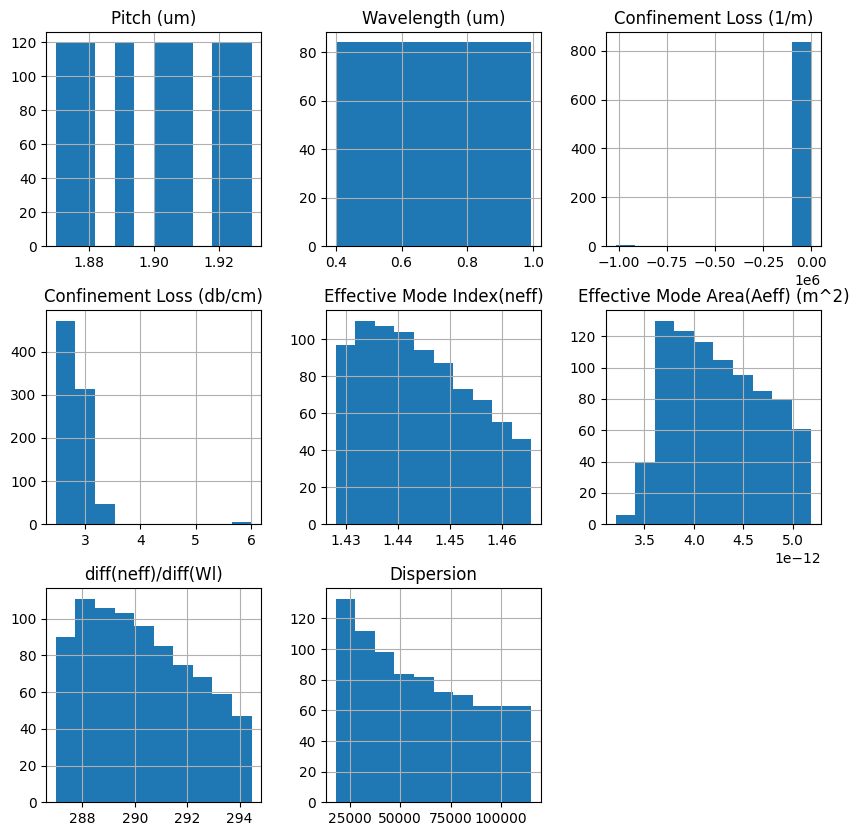

In [ ]:
new_df.hist(bins=10,figsize=(10,10))
plt.show()

# **ANN**

**Predicting Dispersion**

In [ ]:
# Dropping the output features from the dataset
X = new_df.drop(['Confinement Loss (1/m)', 'Confinement Loss (db/cm)', 'Effective Mode Index(neff)', 'Effective Mode Area(Aeff) (m^2)','diff(neff)/diff(Wl)','Dispersion'], axis=1)
Y = new_df['Dispersion']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(50,activation='relu', input_dim=2))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))



import tensorflow
# opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer='Adam')



In [ ]:
# import tensorflow as tf

# early_stopping=keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.0001,
#     patience=20,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0,
# )


In [ ]:
history = model.fit(X_train, Y_train, epochs=500,validation_split=0.33)

Epoch 1/500
15/15 [==============================] - 2s 21ms/step - loss: 4359836160.0000 - val_loss: 4383927808.0000
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 4359731200.0000 - val_loss: 4383772672.0000
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 4359516672.0000 - val_loss: 4383440384.0000
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 4359046144.0000 - val_loss: 4382725120.0000
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 4358064128.0000 - val_loss: 4381255680.0000
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 4356124160.0000 - val_loss: 4378466816.0000
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 4352605696.0000 - val_loss: 4373586944.0000
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 4346613760.0000 - val_loss: 4365341696.0000
Epoch 9/500
15/15 [==============================] - 0s 5ms/ste

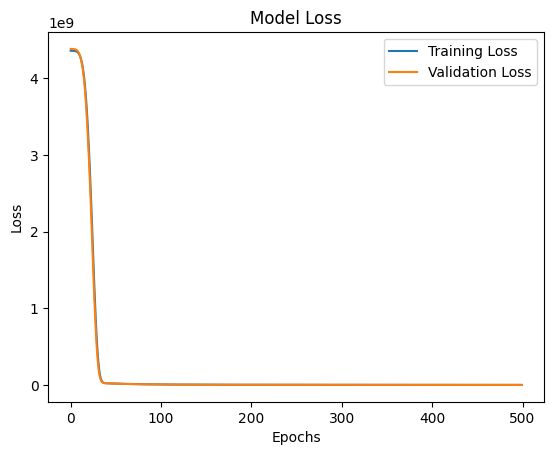

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
print("R2 Score of Dispersion: ", r2_score(Y_test, y_pred))


R2 Score of Dispersion:  0.9997307242113779


In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:

# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(Y_train, train_predictions)
test_mae = mean_absolute_error(Y_test, test_predictions)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)

In [ ]:
print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)
print()
print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

Training MAE:  428.27156364780103
Testing MAE:  351.72682089174117

Training MSE:  309739.61768922646
Testing MSE:  187091.3795341438


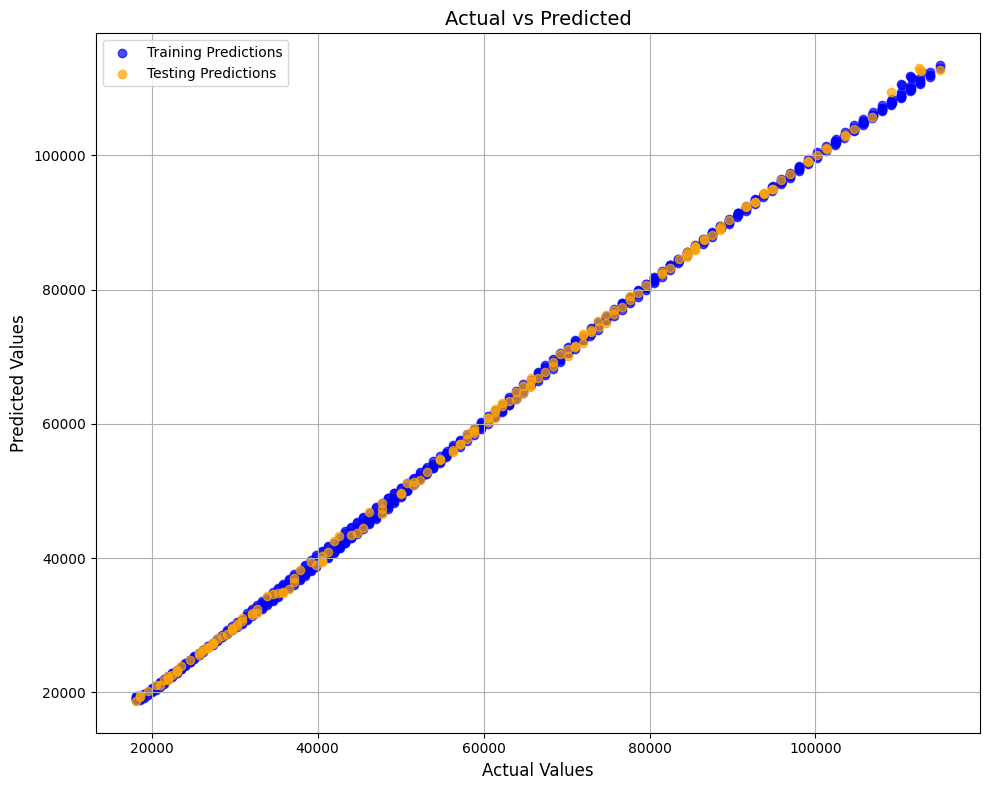

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

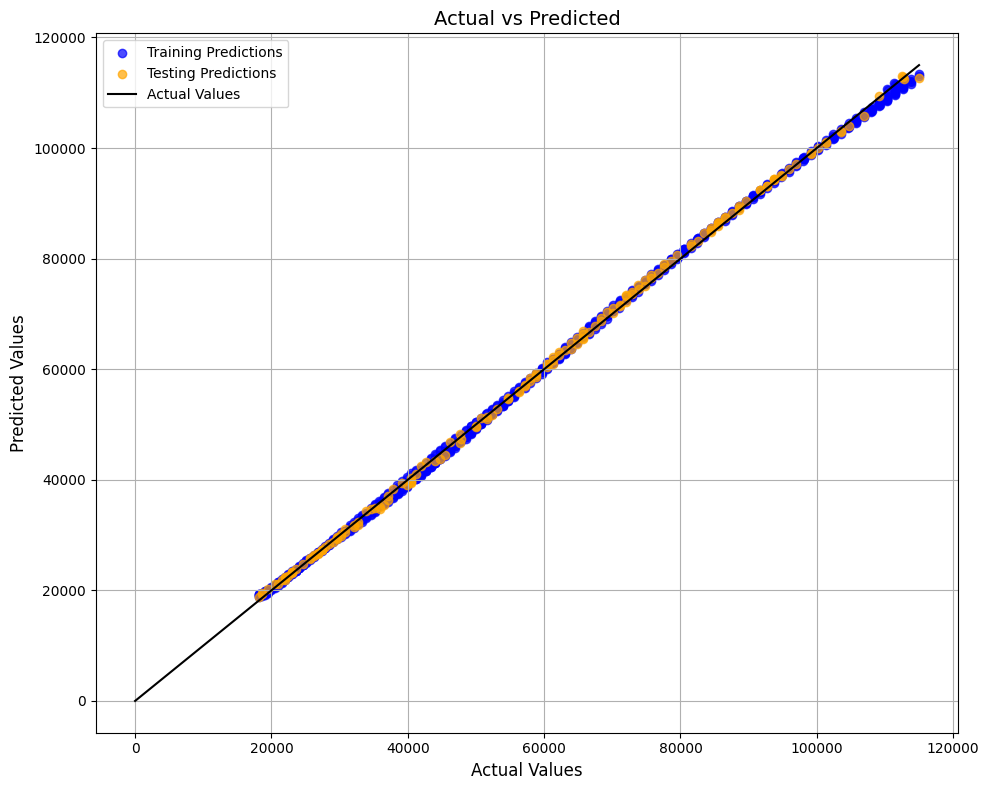

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

# Plotting diagonal line representing actual data
max_val = max(np.max(Y_train), np.max(Y_test))
plt.plot([0, max_val], [0, max_val], linestyle='-', color='black', label='Actual Values')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

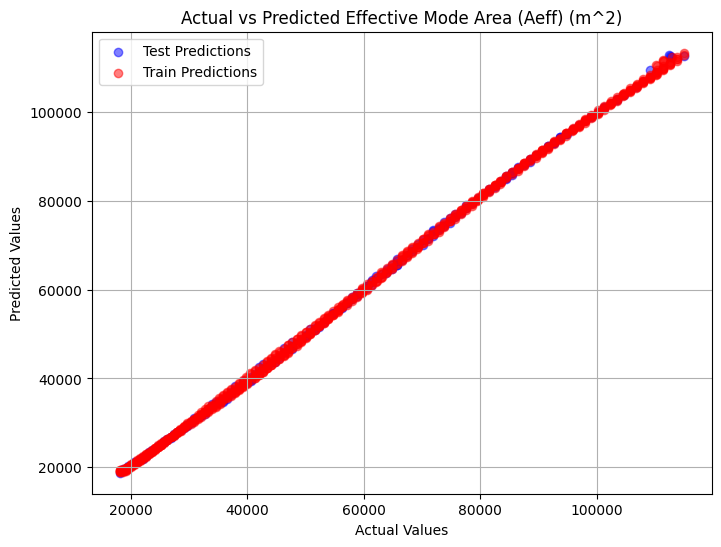

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot for actual vs predicted values of Effective Mode Area
plt.scatter(Y_test, y_pred, label='Test Predictions', color='blue', alpha=0.5)
plt.scatter(Y_train, train_predictions, label='Train Predictions', color='red', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Effective Mode Area (Aeff) (m^2)')
plt.legend()
plt.grid(True)
plt.show()

**Predicting Confinement Loss**

In [ ]:
# Dropping the output features from the dataset
X = new_df.drop(['Confinement Loss (1/m)', 'Confinement Loss (db/cm)', 'Effective Mode Index(neff)', 'Effective Mode Area(Aeff) (m^2)','diff(neff)/diff(Wl)','Dispersion'], axis=1)
Y = new_df['Confinement Loss (db/cm)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(50,activation='relu', input_dim=2))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))



import tensorflow
# opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer='Adam')


In [ ]:
history = model.fit(X_train, Y_train, epochs=500,validation_split=0.33)

Epoch 1/500
15/15 [==============================] - 1s 18ms/step - loss: 7.7478 - val_loss: 5.6957
Epoch 2/500
15/15 [==============================] - 0s 8ms/step - loss: 4.4464 - val_loss: 2.4730
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 1.5303 - val_loss: 0.6587
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 0.6266 - val_loss: 0.5393
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 0.4192 - val_loss: 0.3780
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3576 - val_loss: 0.3255
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3019 - val_loss: 0.2797
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 0.2580 - val_loss: 0.2357
Epoch 9/500
15/15 [==============================] - 0s 8ms/step - loss: 0.2232 - val_loss: 0.1971
Epoch 10/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1859 - val_loss: 0.1651
Epoch 11

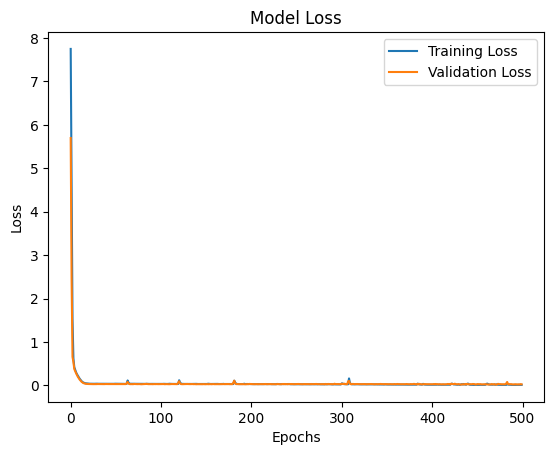

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
print("R2 Score of Confinement Loss(db/cm): ", r2_score(Y_test, y_pred))


R2 Score of Confinement Loss(db/cm):  0.4362823559726553


In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(Y_train, train_predictions)
test_mae = mean_absolute_error(Y_test, test_predictions)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)


print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)
print()
print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

Training MAE:  0.04228216953949248
Testing MAE:  0.0662226887772684

Training MSE:  0.017459109967675922
Testing MSE:  0.08915230088787174


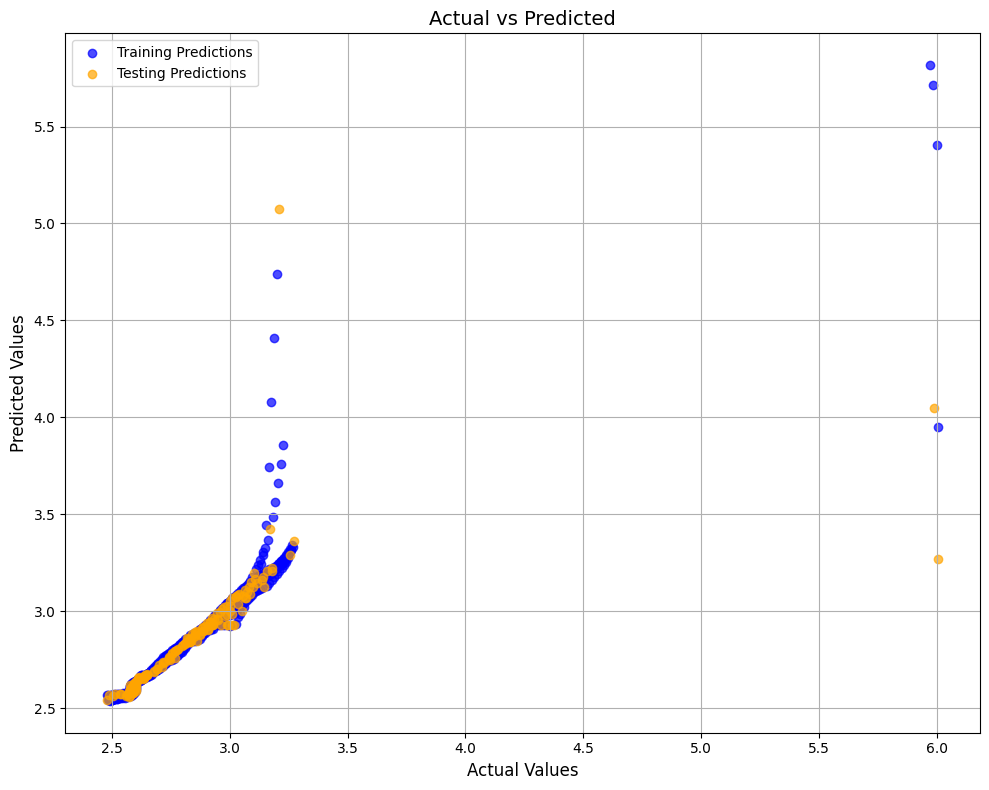

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

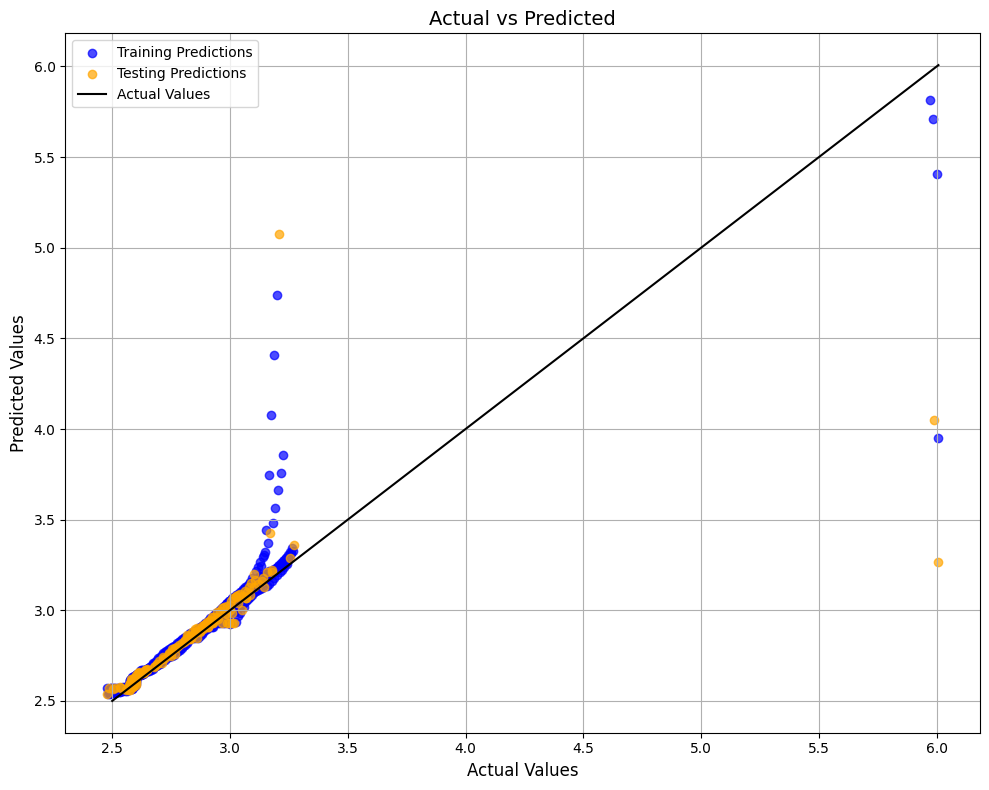

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

# Plotting diagonal line representing actual data
max_val = max(np.max(Y_train), np.max(Y_test))
plt.plot([2.5, max_val], [2.5, max_val], linestyle='-', color='black', label='Actual Values')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

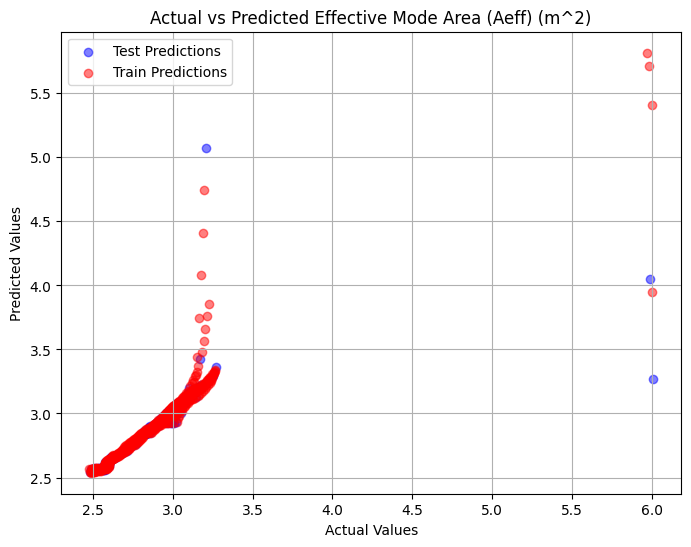

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot for actual vs predicted values of Effective Mode Area
plt.scatter(Y_test, y_pred, label='Test Predictions', color='blue', alpha=0.5)
plt.scatter(Y_train, train_predictions, label='Train Predictions', color='red', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Effective Mode Area (Aeff) (m^2)')
plt.legend()
plt.grid(True)
plt.show()

**Predicting Effective mode index**

In [ ]:
# Dropping the output features from the dataset
X = new_df.drop(['Confinement Loss (1/m)', 'Confinement Loss (db/cm)', 'Effective Mode Index(neff)', 'Effective Mode Area(Aeff) (m^2)','diff(neff)/diff(Wl)','Dispersion'], axis=1)
Y = new_df['Effective Mode Index(neff)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(50,activation='relu', input_dim=2))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))



import tensorflow
# opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=500,validation_split=0.33)

Epoch 1/500
15/15 [==============================] - 1s 14ms/step - loss: 1.5975 - val_loss: 0.9318
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 0.5275 - val_loss: 0.1418
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1490 - val_loss: 0.1501
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1033 - val_loss: 0.0817
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0696 - val_loss: 0.0587
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0472 - val_loss: 0.0319
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.0149
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0051
Epoch 9/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 10/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 6.8643e-04
Epoc

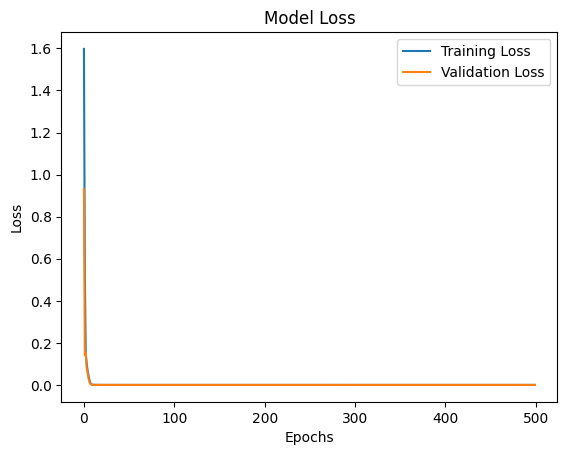

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
print("R2 Score of Effective Mode Index: ", r2_score(Y_test, y_pred))

R2 Score of Effective Mode Index:  0.5860342161568524


In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(Y_train, train_predictions)
test_mae = mean_absolute_error(Y_test, test_predictions)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)


print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)
print()
print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

Training MAE:  0.005041620763636627
Testing MAE:  0.00524643269943454

Training MSE:  3.022547103265311e-05
Testing MSE:  3.7794116057836306e-05


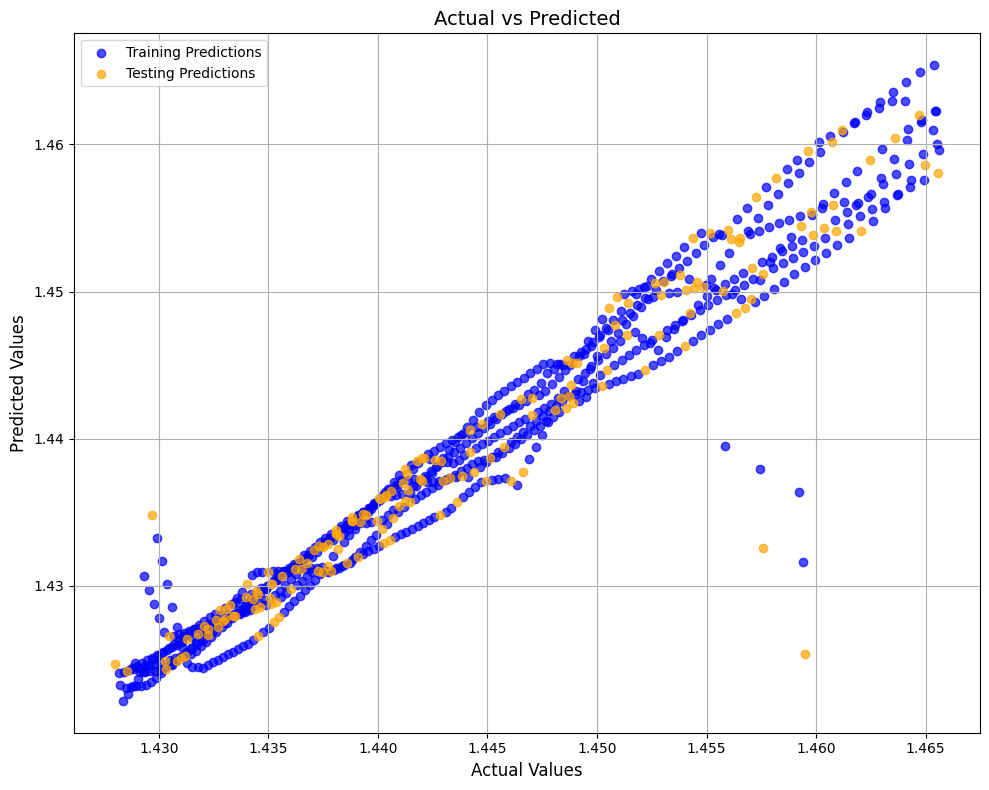

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

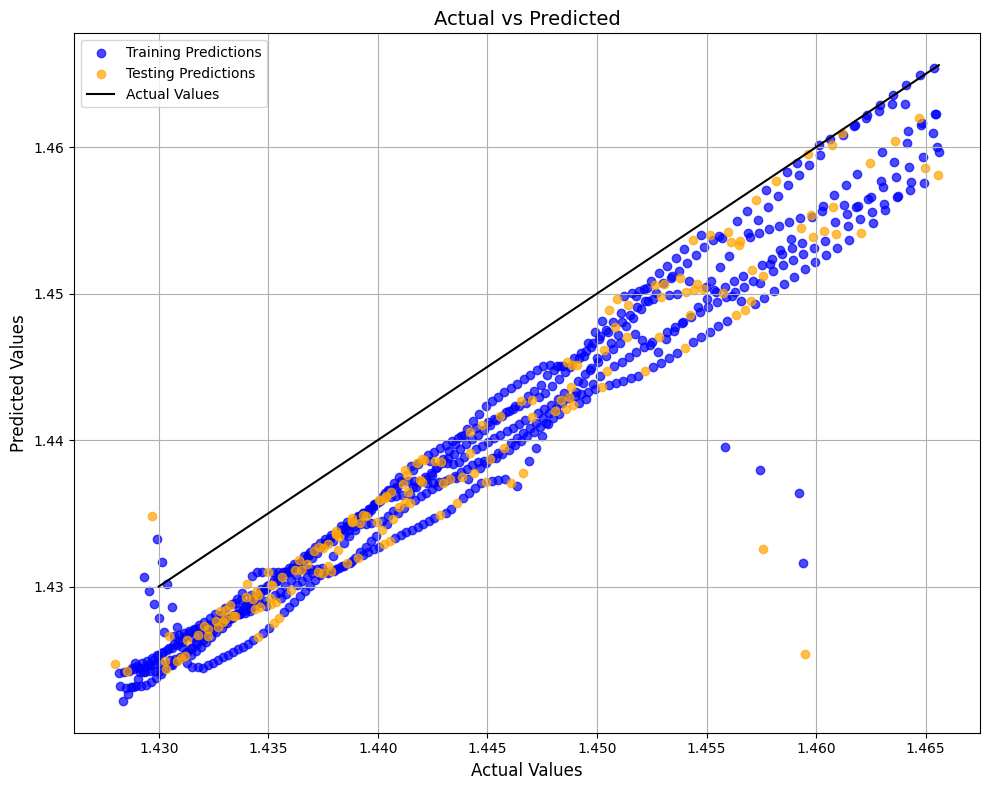

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

# Plotting diagonal line representing actual data
max_val = max(np.max(Y_train), np.max(Y_test))
plt.plot([1.43, max_val], [1.43, max_val], linestyle='-', color='black', label='Actual Values')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

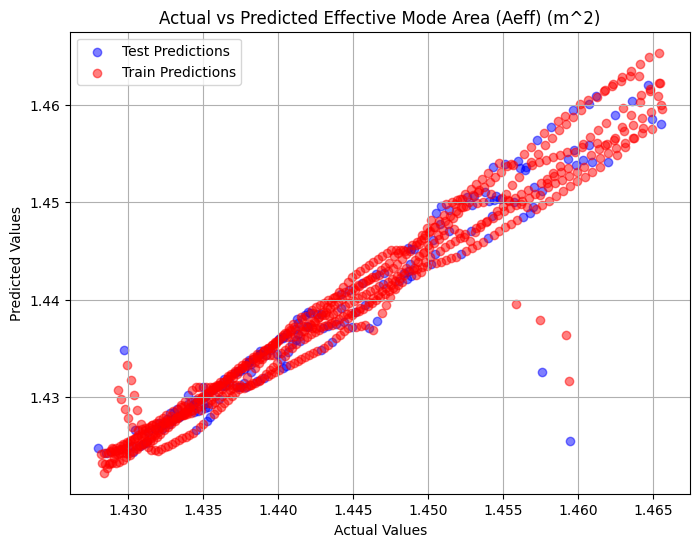

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot for actual vs predicted values of Effective Mode Area
plt.scatter(Y_test, y_pred, label='Test Predictions', color='blue', alpha=0.5)
plt.scatter(Y_train, train_predictions, label='Train Predictions', color='red', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Effective Mode Area (Aeff) (m^2)')
plt.legend()
plt.grid(True)
plt.show()

**Predicting Effective Mode Area**

In [ ]:
# Dropping the output features from the dataset
X = new_df.drop(['Confinement Loss (1/m)', 'Confinement Loss (db/cm)', 'Effective Mode Index(neff)', 'Effective Mode Area(Aeff) (m^2)','diff(neff)/diff(Wl)','Dispersion'], axis=1)
Y = new_df['Effective Mode Area(Aeff) (m^2)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(50,activation='relu', input_dim=2))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))



import tensorflow
# opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer='Adam')


history = model.fit(X_train, Y_train, epochs=500,validation_split=0.33)

Epoch 1/500
15/15 [==============================] - 1s 13ms/step - loss: 0.0098 - val_loss: 0.0024
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 9.1683e-04 - val_loss: 7.4744e-04
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 3.6075e-04 - val_loss: 1.3484e-04
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 9.5502e-05 - val_loss: 5.4522e-05
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 4.5622e-05 - val_loss: 2.7864e-05
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 2.5137e-05 - val_loss: 1.6281e-05
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 1.4215e-05 - val_loss: 1.2467e-05
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 9.8232e-06 - val_loss: 6.9169e-06
Epoch 9/500
15/15 [==============================] - 0s 5ms/step - loss: 7.0727e-06 - val_loss: 6.2654e-06
Epoch 10/500
15/15 [========================

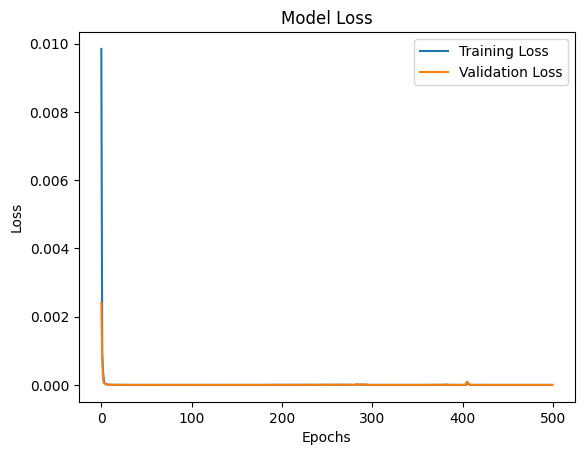

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
print("R2 Score of Effective Mode Area: ", r2_score(Y_test, y_pred))

R2 Score of Effective Mode Area:  -4.187297519161737e+17


In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(Y_train, train_predictions)
test_mae = mean_absolute_error(Y_test, test_predictions)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)


print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)
print()
print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

Training MAE:  0.00020467717981556498
Testing MAE:  0.00022620112948716192

Training MSE:  6.74782978796141e-08
Testing MSE:  7.960936075997636e-08


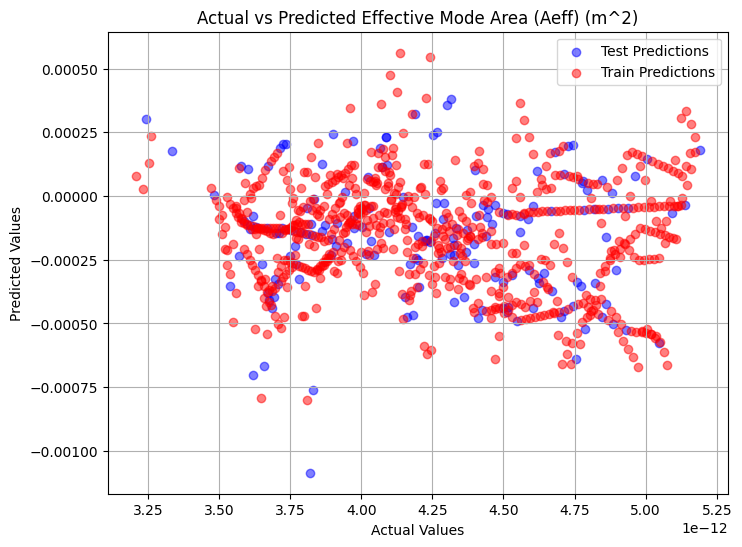

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot for actual vs predicted values of Effective Mode Area
plt.scatter(Y_test, y_pred, label='Test Predictions', color='blue', alpha=0.5)
plt.scatter(Y_train, train_predictions, label='Train Predictions', color='red', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Effective Mode Area (Aeff) (m^2)')
plt.legend()
plt.grid(True)
plt.show()


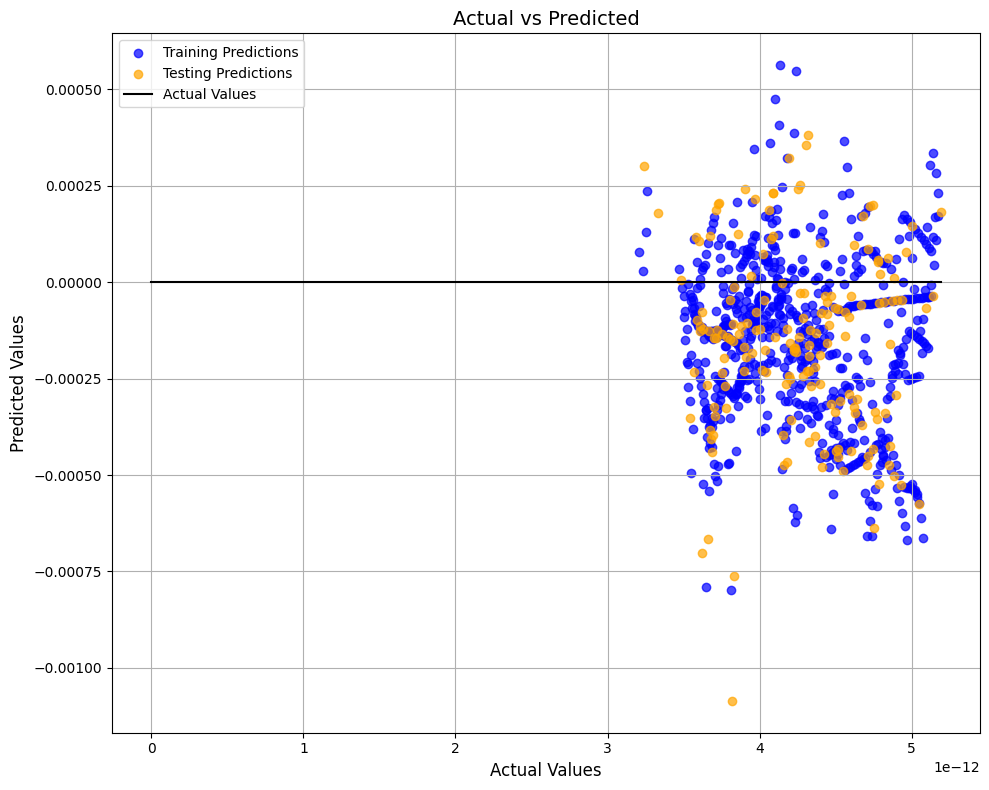

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

# Plotting diagonal line representing actual data
max_val = max(np.max(Y_train), np.max(Y_test))
plt.plot([0, max_val], [0, max_val], linestyle='-', color='black', label='Actual Values')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

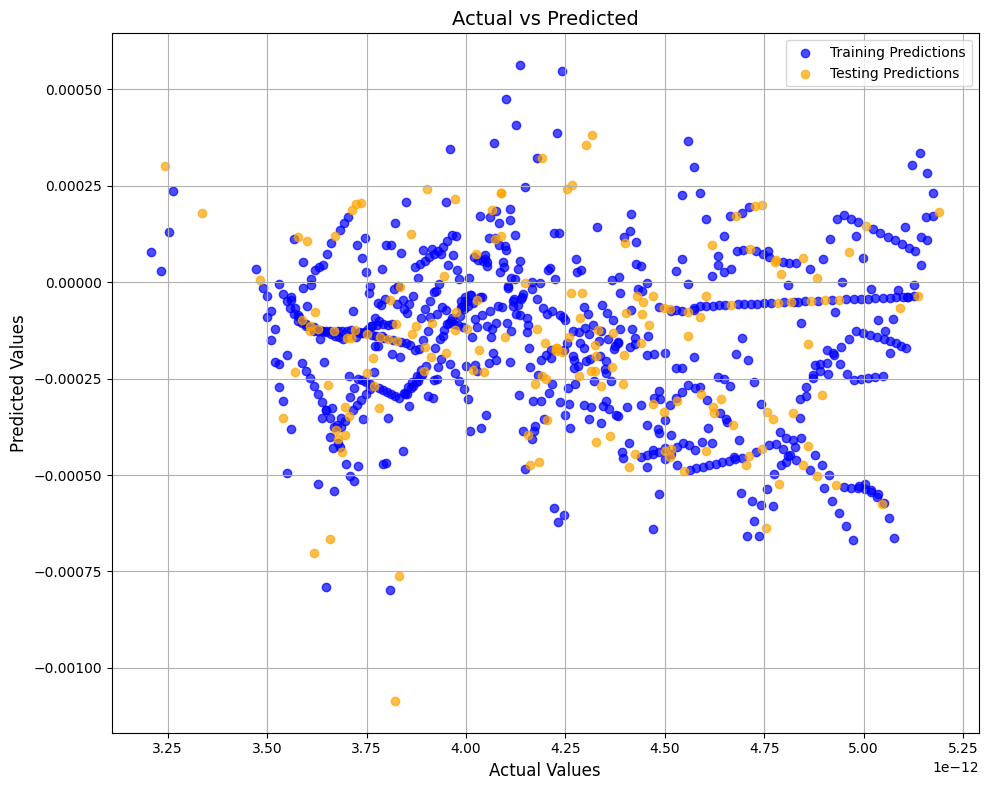

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting training data
plt.scatter(Y_train, train_predictions, label='Training Predictions', alpha=0.7, color='blue')

# Plotting testing data
plt.scatter(Y_test, test_predictions, label='Testing Predictions', alpha=0.7, color='orange')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
X = new_df.drop(['Confinement Loss (1/m)', 'Confinement Loss (db/cm)', 'Effective Mode Index(neff)', 'Effective Mode Area(Aeff) (m^2)','diff(neff)/diff(Wl)','Dispersion'], axis=1)

parameters_to_predict = ['Confinement Loss (db/cm)', 'Effective Mode Index(neff)', 'Effective Mode Area(Aeff) (m^2)', 'Dispersion']
training_predictions_dict = {}
testing_predictions_dict = {}

#for training
tr_score_1 ={}
tr_score_2 ={}
tr_score_3 ={}

#for testing
ts_score_1={}
ts_score_2={}
ts_score_3={}

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20, criterion='squared_error', random_state=12, max_depth=5)

In [ ]:
for parameter in parameters_to_predict:

    Y = new_df[parameter]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

    print(Y)

    model.fit(X_train, Y_train)


    # Make predictions using the trained model
    training_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Store the predictions in the dictionary
    training_predictions_dict[parameter] = training_predictions
    testing_predictions_dict[parameter] = test_predictions


    #TRAINING
    # R squared error
    tr_score_1[parameter] = metrics.r2_score(Y_train, training_predictions)
    # Mean Absolute Error
    tr_score_2[parameter] = metrics.mean_absolute_error(Y_train, training_predictions)
    # Mean Square Error
    tr_score_3[parameter] = metrics.mean_squared_error(Y_train, training_predictions)

    #TEST
    # R squared error
    ts_score_1[parameter] = metrics.r2_score(Y_test, test_predictions)
    # Mean Absolute Error
    ts_score_2[parameter] = metrics.mean_absolute_error(Y_test, test_predictions)
    # Mean Square Error
    ts_score_3[parameter] = metrics.mean_squared_error(Y_test, test_predictions)

0      2.493317
1      2.502253
2      2.511911
3      2.522134
4      2.532712
         ...   
841    3.198334
842    3.209087
843    6.000910
844    5.984338
845    5.971752
Name: Confinement Loss (db/cm), Length: 840, dtype: float64
0      1.465337
1      1.464691
2      1.464065
3      1.463457
4      1.462866
         ...   
841    1.429943
842    1.429715
843    1.459206
844    1.457453
845    1.455846
Name: Effective Mode Index(neff), Length: 840, dtype: float64
0      3.471310e-12
1      3.480791e-12
2      3.490340e-12
3      3.499963e-12
4      3.509663e-12
           ...     
841    5.174845e-12
842    5.189990e-12
843    3.253593e-12
844    3.208631e-12
845    3.233738e-12
Name: Effective Mode Area(Aeff) (m^2), Length: 840, dtype: float64
0       18115.721042
1       18579.392916
2       19048.889205
3       19524.212868
4       20005.366845
           ...      
841    110266.103683
842    109159.577632
843    110397.150041
844    111643.928738
845    112894.457083
Name: Di

In [ ]:
for parameter, predictions in testing_predictions_dict.items():
    print(f"Predictions for parameter for testing '{parameter}':")
    print(predictions)

Predictions for parameter for testing 'Confinement Loss (db/cm)':
[2.59054653 2.84745113 2.82876807 3.18407886 3.1491492  2.73853868
 3.02627652 2.82445463 2.54166504 2.80150655 2.8655203  3.02227759
 2.5836656  3.07818432 3.05389634 2.5836656  2.74551102 2.76363553
 2.72875997 2.6601757  2.59359758 2.5916001  2.97494695 2.83789259
 2.63121228 3.02416872 2.5926859  2.79319683 2.89577076 2.58257981
 2.8655203  3.01743184 3.12626354 2.59359758 2.67073335 3.02107916
 3.03305682 2.97673402 2.59359758 3.05389634 2.6343842  3.09079358
 2.59359758 2.59054653 3.01921891 3.14766429 3.01743184 3.11739483
 2.85851862 2.5836656  2.71850721 3.11887974 2.57504878 2.5836656
 2.80946739 2.80150655 3.21691599 2.5926859  2.87016299 2.59452649
 2.65372261 2.78356082 2.81058427 2.49507265 2.94099716 2.63950481
 2.62167641 3.08665088 4.88835702 2.55825564 2.5926859  2.91374274
 2.91803097 2.63338721 2.95853752 3.10235527 3.02107916 2.87242196
 2.85332198 2.87384847 2.90279135 2.96803375 3.2502742  2.852779

In [ ]:
# TRAINING
for parameter, predictions in tr_score_1.items():
    print(f"R squared error for training data : '{parameter}':")
    print(predictions)

print()

for parameter, predictions in tr_score_2.items():
    print(f"Mean Absolute Error for training data : '{parameter}':")
    print(predictions)

print()

for parameter, predictions in tr_score_3.items():
    print(f"Mean squared Error for training data : '{parameter}':")
    print(predictions)

print("-----------------------------------------------------------------------")


# TESTING
for parameter, predictions in ts_score_1.items():
    print(f"R squared error for testing data: '{parameter}':")
    print(predictions)

print()

for parameter, predictions in ts_score_2.items():
    print(f"Mean Absolute Error for testing data: '{parameter}':")
    print(predictions)

print()

for parameter, predictions in ts_score_3.items():
    print(f"Mean squared Error for testing data: '{parameter}':")
    print(predictions)

print()

R squared error for training data : 'Confinement Loss (db/cm)':
0.9584695672545609
R squared error for training data : 'Effective Mode Index(neff)':
0.990909249861691
R squared error for training data : 'Effective Mode Area(Aeff) (m^2)':
-0.00023040414671049447
R squared error for training data : 'Dispersion':
0.9998468365373904

Mean Absolute Error for training data : 'Confinement Loss (db/cm)':
0.013737586116751693
Mean Absolute Error for training data : 'Effective Mode Index(neff)':
0.0002975074691865274
Mean Absolute Error for training data : 'Effective Mode Area(Aeff) (m^2)':
4.0514674794483704e-13
Mean Absolute Error for training data : 'Dispersion':
252.8686735081858

Mean squared Error for training data : 'Confinement Loss (db/cm)':
0.004484705692484547
Mean squared Error for training data : 'Effective Mode Index(neff)':
9.526670317011685e-07
Mean squared Error for training data : 'Effective Mode Area(Aeff) (m^2)':
2.216267377341026e-25
Mean squared Error for training data : 'D

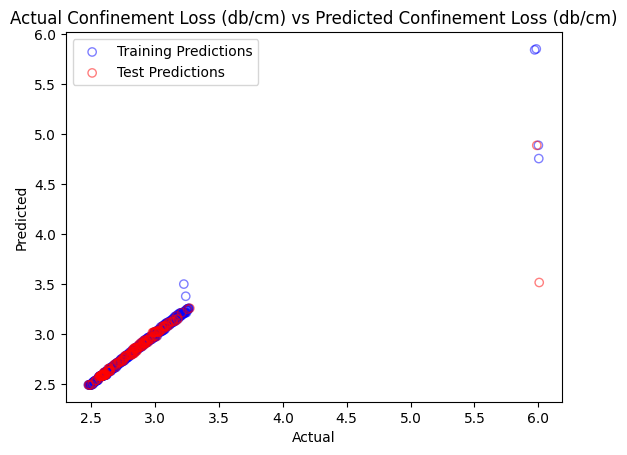

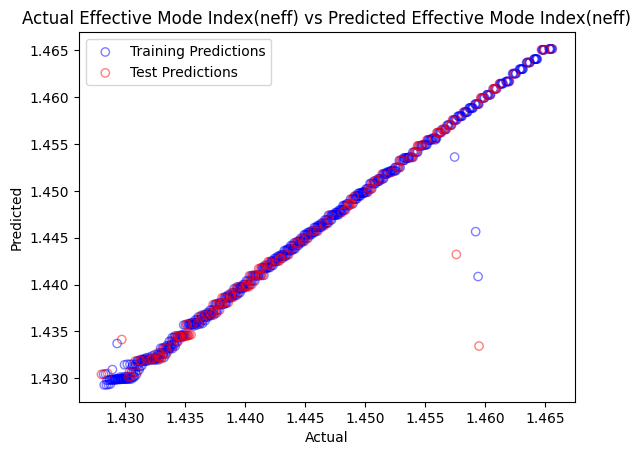

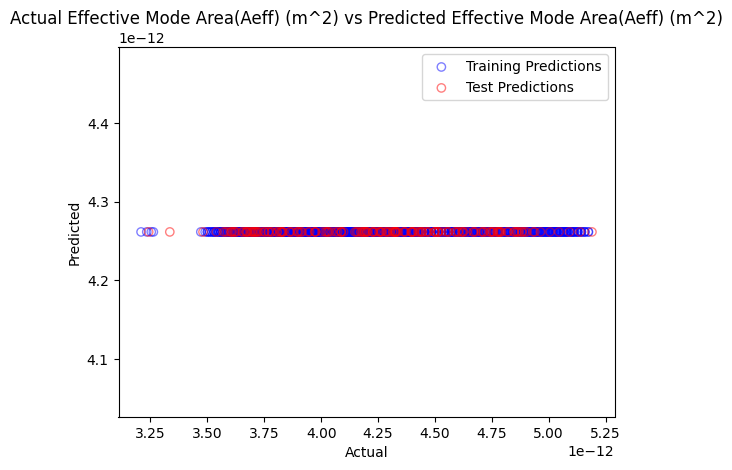

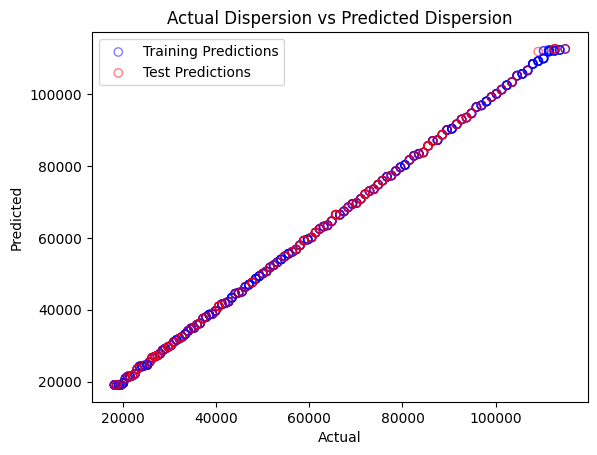

In [ ]:
for parameter in parameters_to_predict:
    Y = new_df[parameter]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    model.fit(X_train, Y_train)

    training_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    training_predictions_dict[parameter] = training_predictions
    testing_predictions_dict[parameter] = test_predictions

    # # Plot a diagonal line representing the actual data points
    # max_val = max(max(Y_train), max(training_predictions), max(Y_test), max(test_predictions))
    # min_val = min(min(Y_train), min(training_predictions), min(Y_test), min(test_predictions))
    # plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-', linewidth=2)

    # Scatter plot for training predicted data
    plt.scatter(Y_train, training_predictions, label='Training Predictions', alpha=0.5, edgecolors='blue', facecolors='none')

    # Scatter plot for test predicted data
    plt.scatter(Y_test, test_predictions, label='Test Predictions', alpha=0.5, edgecolors='red', facecolors='none')

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f'Actual {parameter} vs Predicted {parameter}')
    plt.legend()
    plt.show()

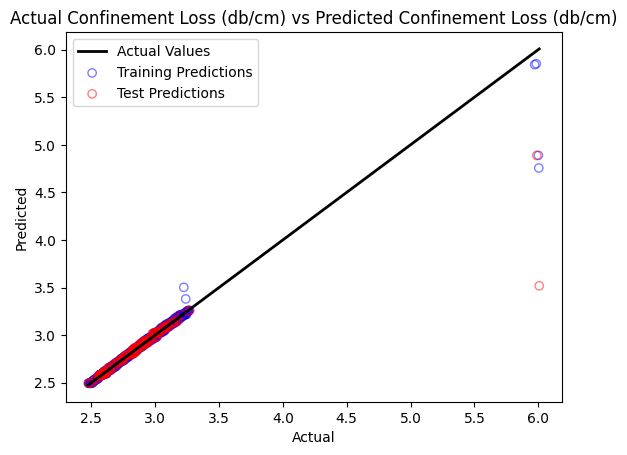

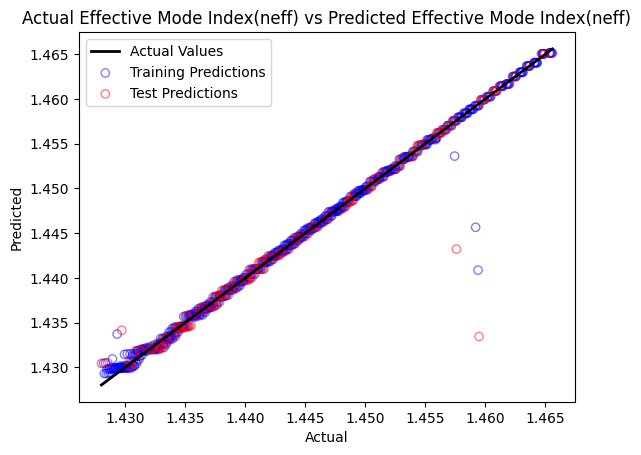

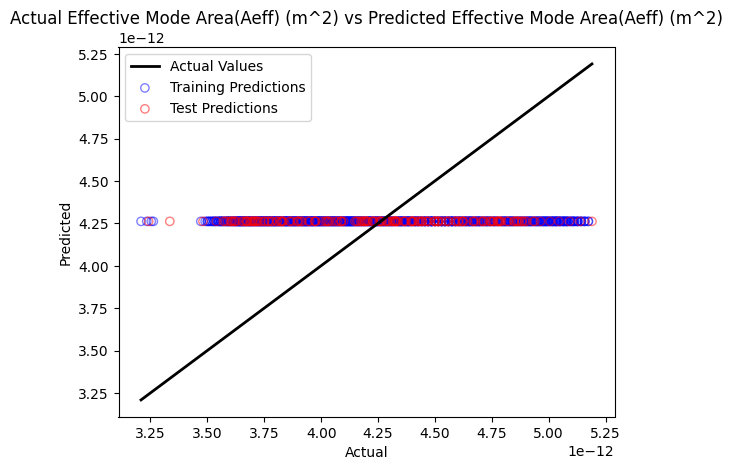

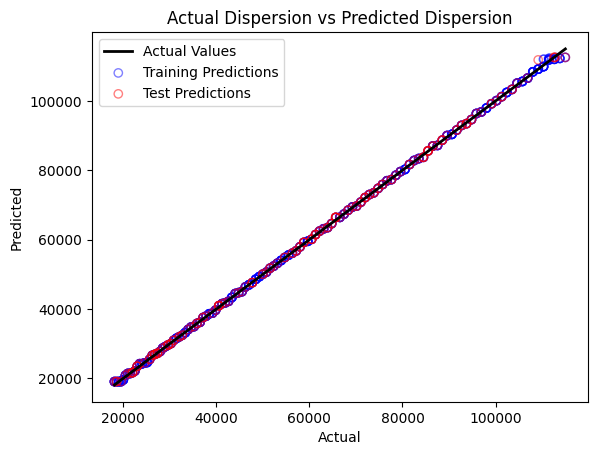

In [ ]:
for parameter in parameters_to_predict:
    Y = new_df[parameter]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    model.fit(X_train, Y_train)

    training_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    training_predictions_dict[parameter] = training_predictions
    testing_predictions_dict[parameter] = test_predictions

    # # Plot a diagonal line representing the actual data points
    max_val = max(max(Y_train), max(training_predictions), max(Y_test), max(test_predictions))
    min_val = min(min(Y_train), min(training_predictions), min(Y_test), min(test_predictions))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-', linewidth=2, label='Actual Values')

    # Scatter plot for training predicted data
    plt.scatter(Y_train, training_predictions, label='Training Predictions', alpha=0.5, edgecolors='blue', facecolors='none')

    # Scatter plot for test predicted data
    plt.scatter(Y_test, test_predictions, label='Test Predictions', alpha=0.5, edgecolors='red', facecolors='none')

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f'Actual {parameter} vs Predicted {parameter}')
    plt.legend()
    plt.show()

# **SVR**

In [ ]:
from sklearn.svm import SVR

# Instantiate the SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)


In [ ]:
for parameter in parameters_to_predict:

    Y = new_df[parameter]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

    print(Y)

    model.fit(X_train, Y_train)


    # Make predictions using the trained model
    training_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Store the predictions in the dictionary
    training_predictions_dict[parameter] = training_predictions
    testing_predictions_dict[parameter] = test_predictions


    #TRAINING
    # R squared error
    tr_score_1[parameter] = metrics.r2_score(Y_train, training_predictions)
    # Mean Absolute Error
    tr_score_2[parameter] = metrics.mean_absolute_error(Y_train, training_predictions)
    # Mean Square Error
    tr_score_3[parameter] = metrics.mean_squared_error(Y_train, training_predictions)

    #TEST
    # R squared error
    ts_score_1[parameter] = metrics.r2_score(Y_test, test_predictions)
    # Mean Absolute Error
    ts_score_2[parameter] = metrics.mean_absolute_error(Y_test, test_predictions)
    # Mean Square Error
    ts_score_3[parameter] = metrics.mean_squared_error(Y_test, test_predictions)

0      2.493317
1      2.502253
2      2.511911
3      2.522134
4      2.532712
         ...   
841    3.198334
842    3.209087
843    6.000910
844    5.984338
845    5.971752
Name: Confinement Loss (db/cm), Length: 840, dtype: float64
0      1.465337
1      1.464691
2      1.464065
3      1.463457
4      1.462866
         ...   
841    1.429943
842    1.429715
843    1.459206
844    1.457453
845    1.455846
Name: Effective Mode Index(neff), Length: 840, dtype: float64
0      3.471310e-12
1      3.480791e-12
2      3.490340e-12
3      3.499963e-12
4      3.509663e-12
           ...     
841    5.174845e-12
842    5.189990e-12
843    3.253593e-12
844    3.208631e-12
845    3.233738e-12
Name: Effective Mode Area(Aeff) (m^2), Length: 840, dtype: float64
0       18115.721042
1       18579.392916
2       19048.889205
3       19524.212868
4       20005.366845
           ...      
841    110266.103683
842    109159.577632
843    110397.150041
844    111643.928738
845    112894.457083
Name: Di

In [ ]:
for parameter, predictions in testing_predictions_dict.items():
    print(f"Predictions for parameter for testing '{parameter}':")
    print(predictions)

Predictions for parameter for testing 'Confinement Loss (db/cm)':
[2.65803799 2.91361661 2.9015738  3.24172317 3.21966855 2.81182759
 3.10251783 2.89256609 2.58462545 2.87199523 2.92840379 3.08814369
 2.64455449 3.14942954 3.1343915  2.61321209 2.8178573  2.83698223
 2.80022226 2.73236109 2.6165105  2.59820085 3.05603412 2.90867378
 2.7138139  3.09588265 2.62575665 2.8661289  2.96519104 2.59700177
 2.92807915 3.0792338  3.1965157  2.64647864 2.75180247 3.08726208
 3.11110098 3.05694234 2.63517513 3.13413836 2.72244539 3.16495978
 2.65942721 2.62892956 3.07979967 3.21901105 3.07896905 3.18795899
 2.92196982 2.62393495 2.78158278 3.18841937 2.59057009 2.64814919
 2.88691617 2.87301028 3.2717488  2.6631534  2.9287804  2.68748701
 2.72707293 2.85069747 2.8875042  2.57188876 3.01103786 2.72303419
 2.70011039 3.15810924 3.29441137 2.5910434  2.62201606 2.98086651
 2.98764834 2.72196285 3.03427241 3.17294645 3.08672359 2.93695721
 2.91477019 2.95037298 2.97382214 3.04092418 3.29476195 2.92055

In [ ]:
# TRAINING
for parameter, predictions in tr_score_1.items():
    print(f"R squared error for training data : '{parameter}':")
    print(predictions)

print()

for parameter, predictions in tr_score_2.items():
    print(f"Mean Absolute Error for training data : '{parameter}':")
    print(predictions)

print()

for parameter, predictions in tr_score_3.items():
    print(f"Mean squared Error for training data : '{parameter}':")
    print(predictions)

print("-----------------------------------------------------------------------")


# TESTING
for parameter, predictions in ts_score_1.items():
    print(f"R squared error for testing data: '{parameter}':")
    print(predictions)

print()

for parameter, predictions in ts_score_2.items():
    print(f"Mean Absolute Error for testing data: '{parameter}':")
    print(predictions)

print()

for parameter, predictions in ts_score_3.items():
    print(f"Mean squared Error for testing data: '{parameter}':")
    print(predictions)

print()

R squared error for training data : 'Confinement Loss (db/cm)':
0.5538800362937453
R squared error for training data : 'Effective Mode Index(neff)':
-0.06517887481738938
R squared error for training data : 'Effective Mode Area(Aeff) (m^2)':
-0.01772564469434723
R squared error for training data : 'Dispersion':
-0.024823360481965873

Mean Absolute Error for training data : 'Confinement Loss (db/cm)':
0.08097602225249093
Mean Absolute Error for training data : 'Effective Mode Index(neff)':
0.009052138972197908
Mean Absolute Error for training data : 'Effective Mode Area(Aeff) (m^2)':
4.0206907500824893e-13
Mean Absolute Error for training data : 'Dispersion':
24692.702536846533

Mean squared Error for training data : 'Confinement Loss (db/cm)':
0.04817471450461008
Mean squared Error for training data : 'Effective Mode Index(neff)':
0.00011162563940975626
Mean squared Error for training data : 'Effective Mode Area(Aeff) (m^2)':
2.2550325765628383e-25
Mean squared Error for training data :

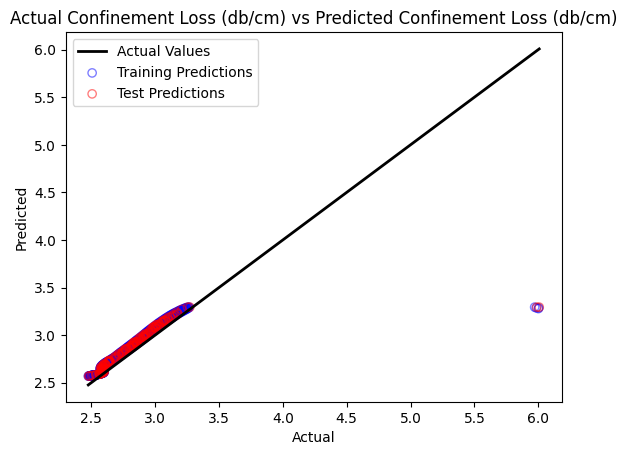

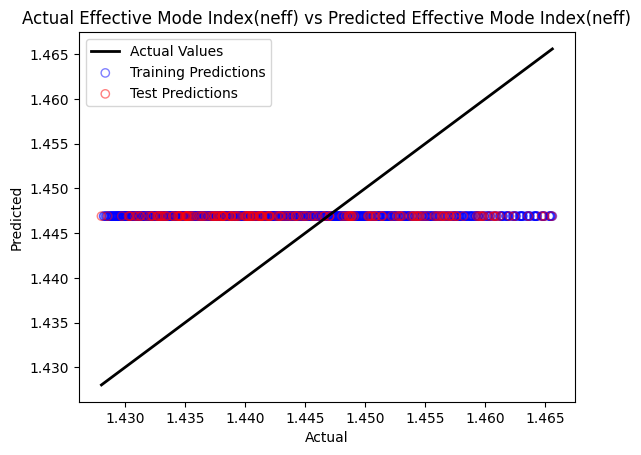

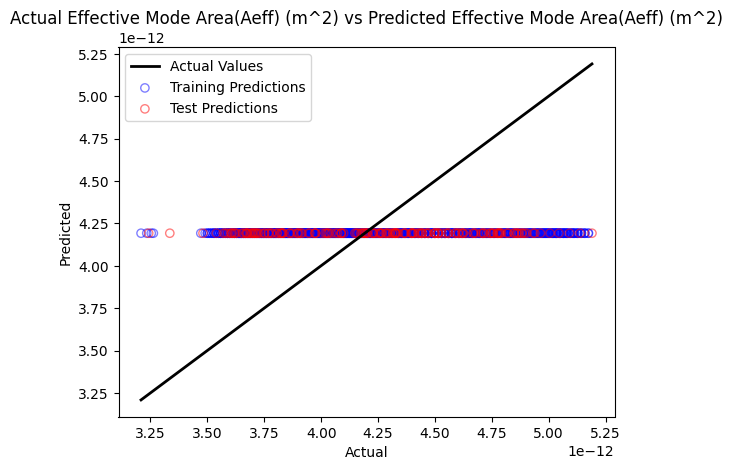

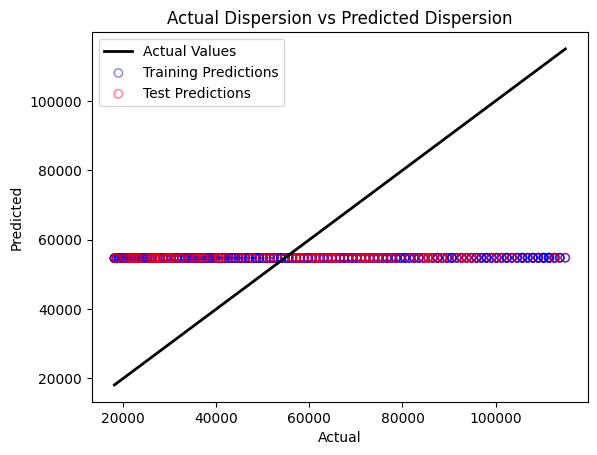

In [ ]:
for parameter in parameters_to_predict:
    Y = new_df[parameter]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    model.fit(X_train, Y_train)

    training_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    training_predictions_dict[parameter] = training_predictions
    testing_predictions_dict[parameter] = test_predictions

    # # Plot a diagonal line representing the actual data points
    max_val = max(max(Y_train), max(training_predictions), max(Y_test), max(test_predictions))
    min_val = min(min(Y_train), min(training_predictions), min(Y_test), min(test_predictions))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-', linewidth=2, label='Actual Values')

    # Scatter plot for training predicted data
    plt.scatter(Y_train, training_predictions, label='Training Predictions', alpha=0.5, edgecolors='blue', facecolors='none')

    # Scatter plot for test predicted data
    plt.scatter(Y_test, test_predictions, label='Test Predictions', alpha=0.5, edgecolors='red', facecolors='none')

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f'Actual {parameter} vs Predicted {parameter}')
    plt.legend()
    plt.show()